## Investigate Median Salary Vs Skill for Data Analyst in India

In [1]:
# Importing the necessary libraries
from datasets import load_dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast

# Loading dataset from Hugging Face and converting to a pandas DataFrame
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset['train'].to_pandas()

# Converting the 'job_posted_date' column to datetime format
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

# Converting 'job_skills' from stringified lists to actual Python lists
df['job_skills'] = df['job_skills'].apply(
    lambda x: ast.literal_eval(x) if pd.notna(x) else x
)

In [2]:
# Set the country for job analysis
v_job_country = 'India'

# Set the job title to analyze
v_job_title = 'Data Analyst'

# Set the number of top skills to include in analysis
v_top_skills = 10

In [3]:
# Filter the dataset for the selected country and job title
df_DA_Ind = df[(df['job_country'] == v_job_country) & (df['job_title_short'] == v_job_title)].copy()

# Split the list of skills into separate rows so each skill has its own row
df_DA_Ind_explode = df_DA_Ind.explode('job_skills')

In [4]:
# Group the data by each skill to calculate:
# - how many times each skill appears
# - the median salary for jobs requiring that skill
df_DA_Ind_group = df_DA_Ind_explode.groupby('job_skills').agg(
    skill_count=('job_skills', 'count'),
    median_salary=('salary_year_avg', 'median')
)

# Get the top skills with the highest median salaries
df_DA_Ind_top_pay_skill = df_DA_Ind_group.sort_values(by='median_salary', ascending=False).head(v_top_skills)

# Get the most common (frequent) skills and sort them by salary
df_DA_Ind_top_skill_count = (
    df_DA_Ind_group
    .sort_values(by='skill_count', ascending=False)
    .head(v_top_skills)
    .sort_values(by='median_salary', ascending=False)
)

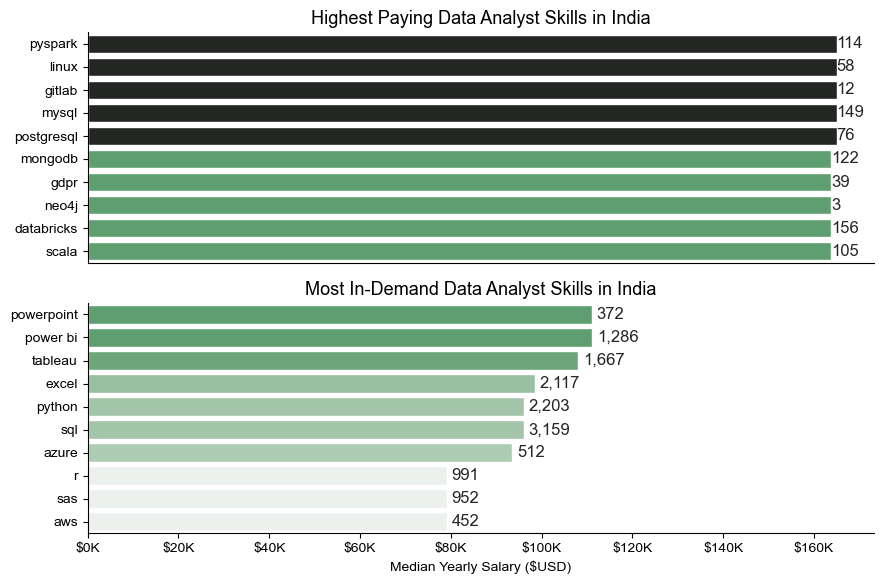

In [5]:
# Create a figure with 2 plots stacked vertically
fig, ax = plt.subplots(2, 1, figsize=(9, 6))

# Use a clean theme for the plots
sns.set_theme(style='ticks')

# First bar plot: Top-paying skills
sns.barplot(data=df_DA_Ind_top_pay_skill,
            x='median_salary',
            y='job_skills',
            hue='median_salary',
            palette='dark:g_r',
            ax=ax[0])

# Clean up the first plot
ax[0].legend().remove()
ax[0].set_xticks([])
ax[0].set_title(f"Highest Paying {v_job_title} Skills in {v_job_country}", fontsize=13)
ax[0].set_ylabel('')
ax[0].set_xlabel('')

# Add skill count labels next to bars
for i, count in enumerate(df_DA_Ind_top_pay_skill['skill_count']):
    ax[0].text(df_DA_Ind_top_pay_skill['median_salary'].iloc[i], i, f"{count:,}", va='center')

# Second bar plot: Most in-demand skills with their salaries
sns.barplot(data=df_DA_Ind_top_skill_count,
            x='median_salary',
            y='job_skills',
            hue='median_salary',
            palette='light:g',
            ax=ax[1])

# Match the x-axis range with the first plot
ax[1].set_xlim(ax[0].get_xlim())

# Clean up the second plot
ax[1].legend().remove()
ax[1].set_title(f"Most In-Demand {v_job_title} Skills in {v_job_country}", fontsize=13)
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Yearly Salary ($USD)')

# Format x-axis values as currency (e.g., $60K)
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f"${int(x/1000)}K"))

# Add skill count labels to bars
for i, count in enumerate(df_DA_Ind_top_skill_count['skill_count']):
    ax[1].text(df_DA_Ind_top_skill_count['median_salary'].iloc[i] + 1000, i, f"{count:,}", va='center')

# Remove plot borders and apply layout
sns.despine()
fig.tight_layout()

# Show the final plots
plt.show()